## 3.4 Native Bayes

### 나이브 베이즈 분류기
* 베이즈 정리(Bayes Theorem)에 기반한 확율적 분류 알고리즘
* 나이브 (Naive) : 순수하다,
    * 각 특성을 개별적으로 취급
    * 통계를 단순하게 취합
    * 확률적 근거로 문제를 해결
    * 각 항목의 특성을 순수하게 본다.
* 주요 분야
    * 문서 분류, 스팸 필터
    * 이상행동(거래) 검출
    * 질병 진단

### 확률 이론
* $\displaystyle p(A) = \frac{The\_number\_of\_event\_can\_occur}{The\_total\_number\_of\_possible\_comes\_out}$
    * ex) $\{사과, 사과, 바나나\}$
        * $p(사과) = \frac{2}{3}$
        * $p(바나나) = \frac{1}{3}$

### 조건부 확률
* $P(A|B)$
    * B가 일어난 상황에서 A가 일어난 상황
    * 표본 공간에서 전체가 아닌 $P(B)$가 되는 것과 같다 	
    * $ \displaystyle P(A|B) = \frac{P(A \bigcap B)}{P(B)}$

### 베이즈 정리
* $ \displaystyle P(h|D) = \frac{P(D|h)P(h)}{P(D)}$ 
    * $P(h)$ : h(hypothesis) 가설이 True일 확률, 사전 확률(전체 데이타 무관)
    * $P(D)$ : 데이터의 사전 확률, 가설 h와 무관
    * $P(h|D)$ : 데이타 D가 주어졌을 때 가설 h의 사후 확률
    * $P(D|h)$ : 가설 h가 True로 주어 졌을 때 데이타 D의 사후 확률

### 나이브 베이즈 주요 흐름
* 주어진 클래스 레이블에 대한 사전 확률 계산
* 각 클래스의 각 속성에 대한 우도(Likelihood) 찾기
* 베이즈 정리 공식에 대입해서 사후 확률 계산
* 주어진 입력에 대한 높은 확률 클래스 찾기
* 주의
    * zero 확률 문제


### sklearn에 구현된 Naive Base 
* `sklearn.naive_bayes.GaussianNB`
    * 연속적 데이타
    * 클래스별 각 특성의 표준편차와 평균을 저장
* `sklearn.naive_bayes.BernoulliNB`
    * 이진 데이타
    * 각 클래스의 특성 중에 1이 아닌것의 갯수
* `sklearn.naive_bayes.MultinomialNB`
    * 이산 데이타 중에 카운트 데이타
    * 클래스별 특성의 평균 계산


### 날씨에 따른 축구 경기 진행 예측 
* Raw Data

|whether | Play |
|---|---|
|sunny | no|
|sunny | no|
|overcast | yes|
|rainy |yes|
|rainy |yes|
|rainy | no|
|overcast | yes|
|summy | no|
|sunny | yes|
|rainy | no|
|sunny | yes|
|overcast | yes|
|overcast | yes|
|rainy | no|

### 날씨에 따른 축구 경기 진행 예측 
* 빈도표(Frrequency Table)

|Whether | No | Yes|
|---|---|---|
|overcast |  | 4|
|sunny | 2 | 3|
|rainy | 3 | 2|
|total | 5 | 9|

### 날씨에 따른 축구 경기 진행 예측 
* 흐린 날 경기 진행 확률 계산
    1. 사전 확률 계산
        * $P(overcast) = \frac{4}{14} = 0.2857$
        * $P(yes) = \frac{9}{14} = 0.6428$
    2. 사후 확률 계산
        * $P(overcast|yes) = \frac{4}{9} = 0.4444$
    3. 베이즈 공식 적용
        * $P(yes|overcast) = \frac{0.4444 \times 0.6428}{0.2857} = 0.9998 $
* 흐린 날 경기 취소 확률 계산
    1. 사전 확률 계산
        * $P(overcast) = \frac{4}{14} = 0.2857$
        * $P(no) = \frac{5}{14} = 0.3571$
    2. 사후 확률 계산
        * $P(overcast|no) = \frac{0}{9} = 0.0$
    3. 베이즈 공식 적용
        * $P(yes|overcast) = \frac{0.0 \times 0.3571}{0.2857} = 0.0 $

#### 날씨에 따른 축구 경기 진행 예측 예제

In [1]:
wheather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [2]:
from sklearn import preprocessing
import numpy as np

le = preprocessing.LabelEncoder()
wheather_encoded=le.fit_transform(wheather)
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Wheather:",wheather_encoded)
print("Temp:",temp_encoded)
print("Play:",label)

Wheather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [3]:
features=np.stack((wheather_encoded,temp_encoded), axis=1)
print(features)

[[2 1]
 [2 1]
 [0 1]
 [1 2]
 [1 0]
 [1 0]
 [0 0]
 [2 2]
 [2 0]
 [1 2]
 [2 2]
 [0 2]
 [0 1]
 [1 2]]


In [4]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(features, label)
predict = model.predict([[0,2]]) #overcast, mild
print(predict)

[1]


#### 와인 분류 예제

In [5]:
from sklearn import datasets
wine = datasets.load_wine()
print(wine.feature_names)
print(wine.target_names)
print(wine.data.shape)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
(178, 13)


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
gnb.fit(x_train, y_train)

print("Train Accuracy :", gnb.score(x_train, y_train))
print("Test Accuracy1 :", gnb.score(x_test, y_test))
y_pred = gnb.predict(x_test)
print("Test Accuracy2 :", metrics.accuracy_score(y_test, y_pred))


Train Accuracy : 0.9919354838709677
Test Accuracy1 : 0.9074074074074074
Test Accuracy2 : 0.9074074074074074


#### 손글씨 숫자 분류 예제

In [8]:
%matplotlib inline
import numpy as np, cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt

digits = load_digits()  #Mnist로 도 해보자

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.2)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Train Accuracy :", gnb.score(X_train, y_train))
print("Test Accuracy1 :", gnb.score(X_test, y_test))


Train Accuracy : 0.8559498956158664
Test Accuracy1 : 0.825


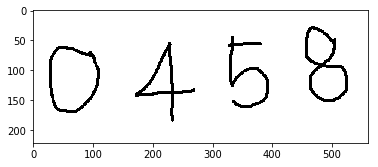

In [9]:
# 인식시킬 손글씨 이미지 읽기 ---③
#file_name = "./img/4027.png"
file_name = "./img/0458.png"
image = cv2.imread(file_name)
plt.imshow(image)

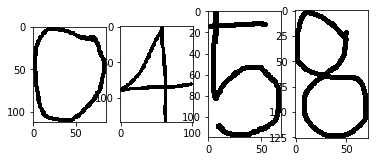

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
contours, hirachy = cv2.findContours(th, cv2.RETR_EXTERNAL, 
                                        cv2.CHAIN_APPROX_SIMPLE)
numbers = []
for c in contours:
    # 컨투어를 감싸는 외접 사각형으로 숫자 영역 좌표 구하기 ---⑦
    (x, y, w, h) = cv2.boundingRect(c)    
    # 외접 사각형의 크기가 너무 작은것은 제외 ---⑧
    if w >= 5 and h >= 25:
        # 숫자 영역만 roi로 확보하고 사각형 그리기 ---⑨
        roi = gray[y:y + h, x:x + w]
        numbers.append(roi)
for i, n in enumerate(numbers):
    plt.subplot(1,len(numbers), i+1)
    plt.imshow(n, cmap="gray")

In [11]:
def digit2data(src, reshape=True):
    h, w = src.shape[:2]
    square = src
    # 정사각형 형태로 만들기
    if h > w:
        pad = (h - w)//2
        square = np.zeros((h, h), dtype=np.uint8)
        square[:, pad:pad+w] = src
    elif w > h :
        pad = (w - h)//2
        square = np.zeros((w, w), dtype=np.uint8)
        square[pad:pad+h, :] = src
    # 0으로 채워진 8x8 이미지 생성
    px = np.zeros((8,8), np.uint8)
    # 원본을 8x8으로 축소
    px[:, :] = cv2.resize(square, (8,8), interpolation=cv2.INTER_AREA)
    if reshape:
        # 1x64형태로 변환
        px = px.reshape((1,8*8))
    return px    

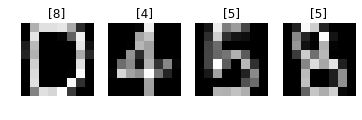

In [12]:
for i, n in enumerate(numbers):
    n = 255- n  # 반전
    data = digit2data(n)
    pred = gnb.predict(data)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(digit2data(n, False), cmap="gray")
    plt.axis("off")